# 1.) Preprocess your data into scaled input variables and an output variable


In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/Machine Learning Lab/CLV.csv')

In [4]:
df.head(2)

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1


In [5]:
df.describe()

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.00000
mean,4566.500000,8004.940475,37657.380009,2.966170,434.088794,15.097000,0.103569,0.703306,0.490037,0.623823,0.047296,0.030874,0.253668,0.215459,0.743157,0.149880,0.580031,0.27009
std,2636.903013,6870.967608,30379.904734,2.390182,290.500092,10.073257,0.304717,0.456825,0.499928,0.484452,0.212282,0.172985,0.435133,0.411163,0.436916,0.356973,0.493581,0.44403
min,0.000000,1898.007675,0.000000,1.000000,0.099007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2283.250000,3994.251794,0.000000,1.000000,272.258244,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4566.500000,5780.182197,33889.500000,2.000000,383.945434,14.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000
75%,6849.750000,8962.167041,62320.000000,4.000000,547.514839,23.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.00000
max,9133.000000,83325.381190,99981.000000,9.000000,2893.239678,35.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [6]:
X = df.drop(["Unnamed: 0","Customer Lifetime Value"], axis =1 )
y = df['Customer Lifetime Value']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [10]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [11]:
clf = MLPRegressor()

params = {
    "hidden_layer_sizes": [(10,), (20,5,)], 
    "activation" : ['relu','logistic'],
    'alpha': [0.001, 0.01]
}

In [ ]:
grid = GridSearchCV(clf, params, cv = 5)
grid.fit(X_train, y_train)

In [13]:
print('Best parameters: ', str(grid.best_params_))
print('Best score: ', str(grid.best_score_))

Best parameters:  {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (20, 5)}
Best score:  0.0492179687762637


# 3.) Train a model with the optimal solution from GridSearch

In [14]:
model = MLPRegressor(**grid.best_params_)

In [15]:
model = model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
oos_y_pred = model.predict(X_test)
in_sample_y_pred = model.predict(X_train)

# 4.) What are the in-sample and out of sample MSEs

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
in_sample_mse = mean_squared_error(y_train, in_sample_y_pred)
oos_mse = mean_squared_error(y_test, oos_y_pred)

In [19]:
print("The in sample mean squared error is " +  str(in_sample_mse))
print("The out of sample mean squared error is " + str(oos_mse))

The in sample mean squared error is 43380141.95040591
The out of sample mean squared error is 45821993.269796655


# 5.) Build a Keras with the architecture defined by GridSearchCV

In [20]:
import keras.models 
from keras.optimizers import Adam 
from keras.models import Sequential 
from keras.layers import Dense 

In [21]:
model = Sequential()
model.add(Dense(12, input_dim = X_train.shape[1], activation='relu',))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation = 'softmax'))

In [22]:
model.compile(loss='mse', optimizer=Adam(lr=0.01))
model.fit(X_train, y_train, batch_size=32, epochs=100)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 109806824.0000
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 109806856.0000
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 109806848.0000
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 109806888.0000
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 109806872.0000
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 109806832.0000
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 109806864.0000
Epoch 8/100
200/200 [==============================] - 0s 2ms/step - loss: 109806816.0000
Epoch 9/100
200/200 [==============================] - 0s 2ms/step - loss: 109806888.0000
Epoch 10/100
200/200 [==============================] - 0s 1ms/step - loss: 109806888.0000
Epoch 11/100
200/200 [==============================] - 0s 2ms/step - loss: 109806848.0000
Epoch 12

In [23]:
keras.models.save_model(model,'tmp_models') 
mod = keras.models.load_model('tmp_models')
mod.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                204       
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 373
Trainable params: 373
Non-trainable params: 0
_________________________________________________________________


# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

In [24]:
#using plot model 
from tensorflow.keras.utils import plot_model

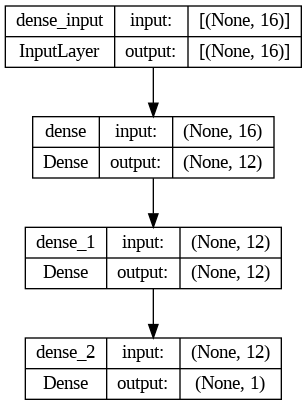

In [25]:
plot_model(mod, show_shapes=True)

In [35]:
 from ann_visualizer.visualize import ann_viz

In [40]:
ann_viz(mod, title='Neural Network Visualization', view=True, filename='mod')

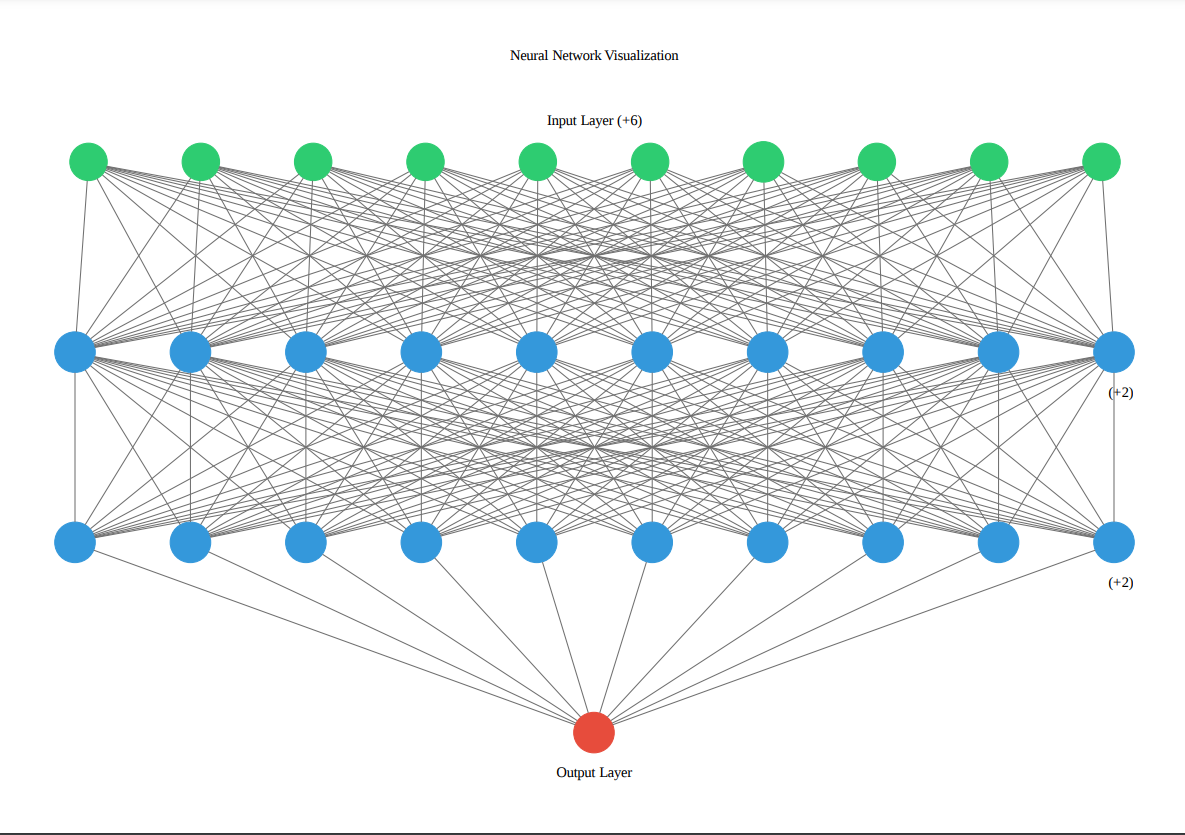